# **Import Libraries & Functions**

In [35]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# **Load Dataset 🗂️**

In [2]:
df = pd.read_csv('/content/Life Expectancy Data.csv')

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df_num = df.select_dtypes(include=['number'])
df_num.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
print(df_num.isnull().sum())

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


# **Handle Missing Values 🔍**

In [7]:
df_num = df_num.fillna(df_num.mean())

In [8]:
print(df_num.isnull().sum())

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


# **Normalization ⚖️**

In [9]:
Max = df_num.max()
Min = df_num.min()

In [14]:
scaled = (df_num - Min) / (Max - Min)

In [15]:
scaled.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.000000,0.544592,0.362881,0.034444,0.0,0.003659,0.653061,0.005439,0.209733,0.0332,0.031250,0.452118,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,0.933333,0.447818,0.373961,0.035556,0.0,0.003774,0.622449,0.002319,0.203940,0.0344,0.572917,0.453279,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,0.866667,0.447818,0.369806,0.036667,0.0,0.003759,0.642857,0.002027,0.198146,0.0356,0.614583,0.450377,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,0.800000,0.440228,0.375346,0.038333,0.0,0.004014,0.673469,0.013135,0.192352,0.0372,0.666667,0.473012,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,0.733333,0.434535,0.379501,0.039444,0.0,0.000364,0.683673,0.014200,0.187717,0.0388,0.677083,0.435287,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937


# **Set Seed 🌱**

In [18]:
SEED = 42
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1' 
random.seed(SEED)
np.random.seed(SEED)

# **Split Dataset**

In [21]:
scaled.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [22]:
x = scaled[['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']]
y = scaled[['Life expectancy ']]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Support Vector Regression (SVR) 📈**

In [36]:
modelSVR = SVR(kernel='rbf', epsilon=0.1)
modelSVR.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [37]:
predictedSVR = modelSVR.predict(x_test)

In [41]:
# Combine predicted values with ground truth values
resultsSVR = pd.DataFrame({'Predicted Value': predictedSVR.flatten(), 'Ground Truth': y_test.values.flatten()})
resultsSVR

,Predicted Value,Ground Truth
0,0.636053,0.709677
1,0.801080,0.751423
2,0.755124,0.719165
3,0.749896,0.768501
4,0.294846,0.296015
...,...,...
583,0.473151,0.444023
584,0.791605,0.705882
585,0.520019,0.470588
586,0.643725,0.631879


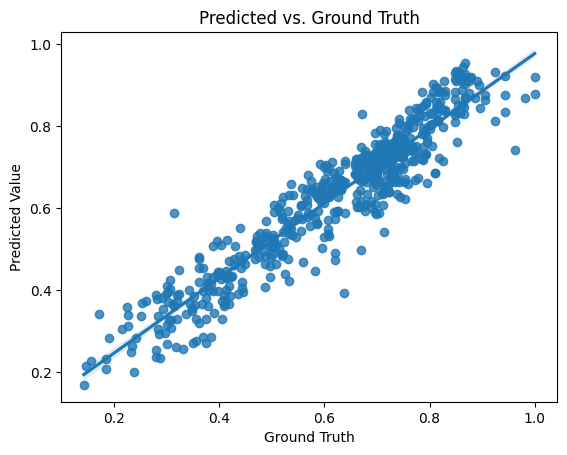

In [42]:
# Extract the predicted and ground truth values
predicted = resultsSVR['Predicted Value']
ground_truth = resultsSVR['Ground Truth']

# Create a scatter plot with stat_smooth line
sns.regplot(x=ground_truth, y=predicted)
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Value')
plt.title('Predicted vs. Ground Truth')
plt.show()

In [43]:
# Calculate the MSE
mse = mean_squared_error(ground_truth, predicted)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.003522840953962061
